In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import medfilt
import optris_csv as ocsv
%matplotlib widget

In [2]:
data = ocsv.OptrisDataset("./25C_low.dat").build_array_data()
TIME_CUTOFF = 9000
data = data[data["time"] <= TIME_CUTOFF]
OPTRIS_SIGMA = 0.2

# print(data.keys())

0.13482309609793172
0.1151554070377141
0.18074090942656082
0.16114439971156772
0.1432726167358351
0.1786950357929138
0.1741658681576648


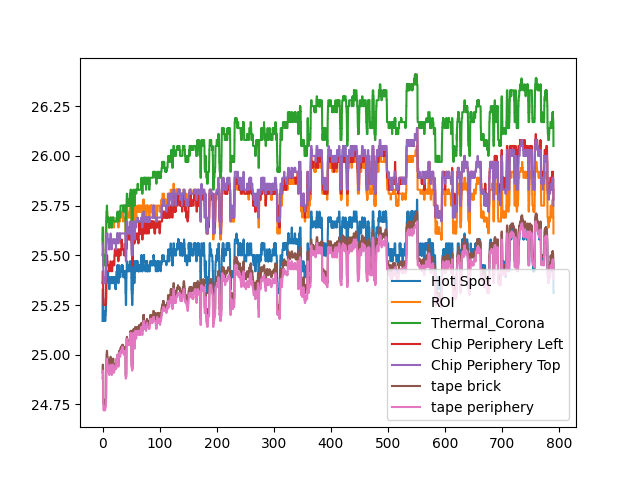

In [3]:
time = data["time"]

plt.close(1)
fig1, ax1 = plt.subplots(num=1)
for k in data.keys():
    if k != "time":
        print(data[k].std())
        baseline = medfilt(data[k], kernel_size=121)
        ax1.plot(time, baseline, label=k)
        data[k] -= baseline
ax1.legend()

plt.show()

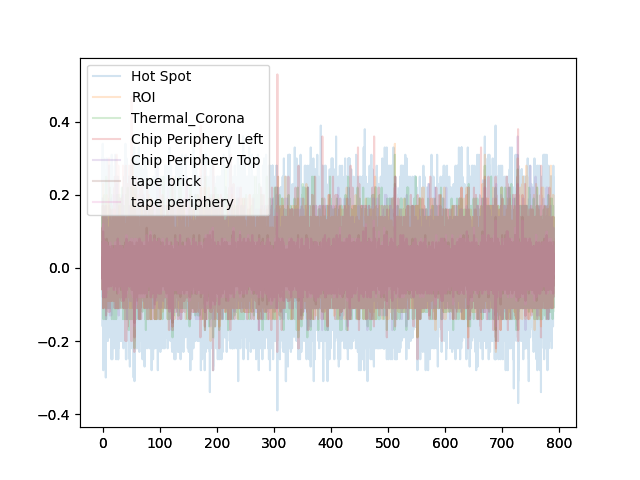

In [7]:
fig2, ax2 = plt.subplots(num=2)
for k in data.keys():
    if k != "time":
        ax2.plot(time, data[k], alpha=0.2, label=k)

ax2.legend()
plt.show()

Hot Spot: 0.088693
0.19500000000000028
ROI: 0.049961
0.14250000000000096
Thermal_Corona: 0.056353
0.1324999999999994
Chip Periphery Left: 0.055078
0.20250000000000057
Chip Periphery Top: 0.050385
0.13999999999999968
tape brick: 0.028633
0.10000000000000053
tape periphery: 0.029137
0.09750000000000014


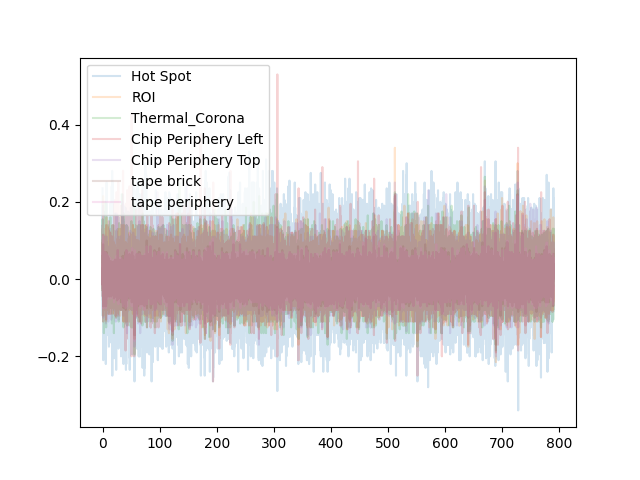

In [9]:
# rolling average of noise over time


plt.close(3)
fig3, ax3 = plt.subplots(num=3)

N = 2

for k in data.keys():
    if k != "time":
        y = data[k]
        print(f"{k}: {y.std():.6f}")
        dof4 = np.abs(y.max() - y.min()) / 4
        print(dof4)
        y = np.convolve(y, np.ones(N)/N, mode='valid')
        ax3.plot(time.iloc[:-(N - 1)], y, alpha=0.2, label=k)


ax3.legend()
plt.show()

# Hot Spot: 0.088693
# ROI: 0.049961
# Thermal_Corona: 0.056353
# Chip Periphery Left: 0.055078
# Chip Periphery Top: 0.050385
# tape brick: 0.028633
# tape periphery: 0.029137

Hot Spot: 0.088693
ROI: 0.049961
Thermal_Corona: 0.056353
Chip Periphery Left: 0.055078
Chip Periphery Top: 0.050385
tape brick: 0.028633
tape periphery: 0.029137


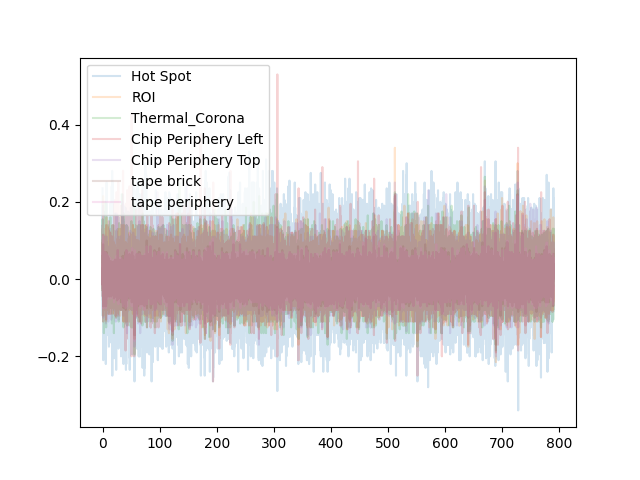

In [6]:
# rolling average of noise over time


plt.close(3)
fig3, ax3 = plt.subplots(num=3)

N = 2

for k in data.keys():
    if k != "time":
        y = data[k]
        print(f"{k}: {data[k].std():.6f}")
        y = np.convolve(y, np.ones(N)/N, mode='valid')
        ax3.plot(time.iloc[:-(N - 1)], y, alpha=0.2, label=k)


ax3.legend()
plt.show()